In [2]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import cv2
import os
import numpy as np
from utils import *
from shapely import geometry
from faces_clustering import get_files_folder, VideoClustering, is_image
from faces_viewport import extract_frames, detect_faces, detect_faces_viewports, show_bounds, non_maximum_supression

Using TensorFlow backend.


In [3]:
from IPython.core.pylabtools import figsize
figsize(12, 5)

## Extracting Frames

In [4]:
video_path = 'C:/Users/paulo/Pictures/test_faces/rick_rolled/'

In [5]:
dir_path = video_path.split('.')[0]
dir_path

'C:/Users/paulo/Pictures/test_faces/rick_rolled/'

In [6]:
#dir_path = extract_frames(video_path)

## Extracting Viewports

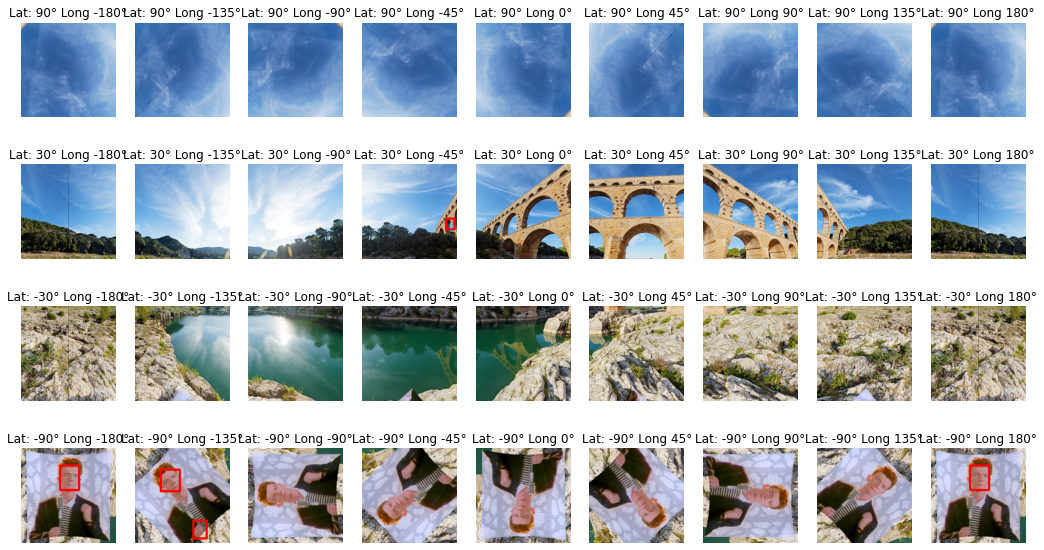

In [7]:
#path = "../data/dataset_360/FDDB-fold-01/2002_07_25_big_img_919.jpg"
#path = "../data/dataset_360/FDDB-fold-01/2002_07_27_big_img_970.jpg" 
path = "C:/Users/paulo/Pictures/test_faces/rick_rolled/lat 90 long 180.png"
equ, eq_bounds, all_confs = detect_faces_viewports(path, rows = 4, cols = 9, fovw = 60, fovh = 60, width = 300, verbose = 1)

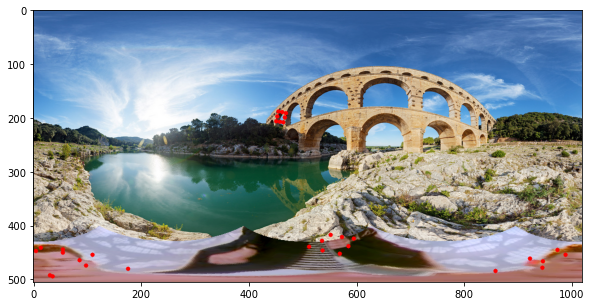

In [8]:
eq_img = np.uint16(equ._img[:,:,::-1])

img = show_bounds(eq_img, eq_bounds)

In [9]:
eq_bounds = [adjust_bounds(eq_bound, equ._img.shape[1]) for eq_bound in eq_bounds]

C:\Users\paulo\anaconda3\envs\faces\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


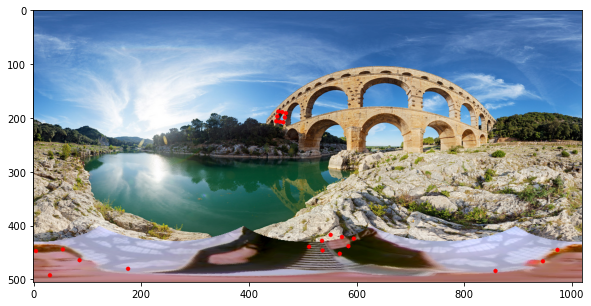

In [11]:
polys = [geometry.Polygon(eq_bound).buffer(0) for eq_bound in eq_bounds]

D = non_maximum_supression(polys, all_confs.copy(), 0.5)
nms_bounds = [eq_bounds[d] for d in D]
nms_polys = [polys[d] for d in D]
img = show_bounds(eq_img, nms_bounds)

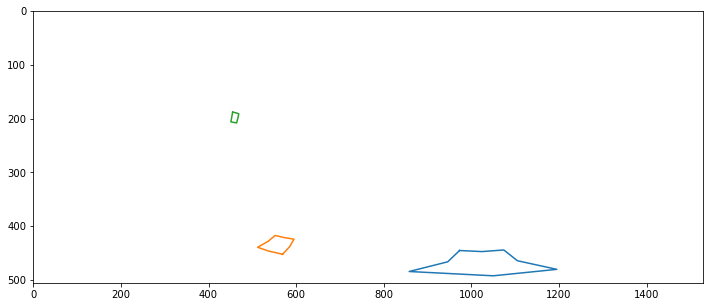

In [12]:
for poly in nms_polys:
    plt.plot(*poly.exterior.xy)
    plt.xlim(0, 1.5*img.shape[1])
    plt.ylim(0, img.shape[0])
    plt.gca().invert_yaxis()

plt.show()